# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [4]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""
total_fruits = 100
apples = 60
oranges = 40
p = apples / total_fruits
q = oranges / total_fruits
print(f"Probability of picking an apple: {p}")
print(f"Probability of picking an orange: {q}")

Probability of picking an apple: 0.6
Probability of picking an orange: 0.4


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [34]:
# What is the probability that the first 5 fruits are all apples?**

k = 5
p_apples = apples / total_fruits
p = p_apples ** k

print(f"Probability of picking exacty {k} apples: {p}")

# What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?

k_1 = 5
k_2 = 15
p_apples = apples / total_fruits
p_oranges = oranges / total_fruits

p = p_apples ** k_1 * p_oranges ** k_2
print(f"Probability of picking exacty {k_1} apples first and {k_2} oranges: {p:.7f}")


Probability of picking exacty 5 apples: 0.07775999999999998
Probability of picking exacty 5 apples first and 15 oranges: 0.0000001


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [42]:
n = 20  # Number of fruits
p = 0.6  # Probability of apple

k_1 = 5  # Number of apples the user hopes to get in the sample
prob_apples = stats.binom.pmf(k_1, n, p)  # Calculate the probability with binomial distribution
print(f"Probability of picking exactly {k_1} apples: {prob_apples:.4f}")

n = 20  # Number of fruits
q = 0.4  # Probability of orange

k_2 = 15  # Number of oranges the user hopes to get in the sample
prob_oranges = stats.binom.pmf(k_2, n, q)  # Calculate the probability with binomial distribution
print(f"Probability of picking exactly {k_2} oranges: {prob_oranges:.4f}")






Probability of picking exactly 5 apples: 0.0013
Probability of picking exactly 15 oranges: 0.0013


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [52]:
# Cumulative probability = probability of k = 1,2,3 and 4

n = 20  # Number of fruits
p = 0.6  # Probability of apple
k_max = 4

# k = [1,2,3,4]  # Number of apples the user hopes to get in the sample
# we use a while loop
p_cumulative = 0
k=0
while k <= k_max:
    p_k = stats.binom.pmf(k, n, p)  # Calculate the probability with binomial distribution
    p_cumulative += p_k
    k +=1

print(f"Cumulative Probability of picking less than {k_max + 1} apples: {p_cumulative:.6f}")

0 1.0995116277760011e-08
1 3.298534883328002e-07
2 4.700412208742411e-06
3 4.2303709878681673e-05
4 0.0002696861504765956
Cumulative Probability of picking less than 5 apples: 0.000317


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

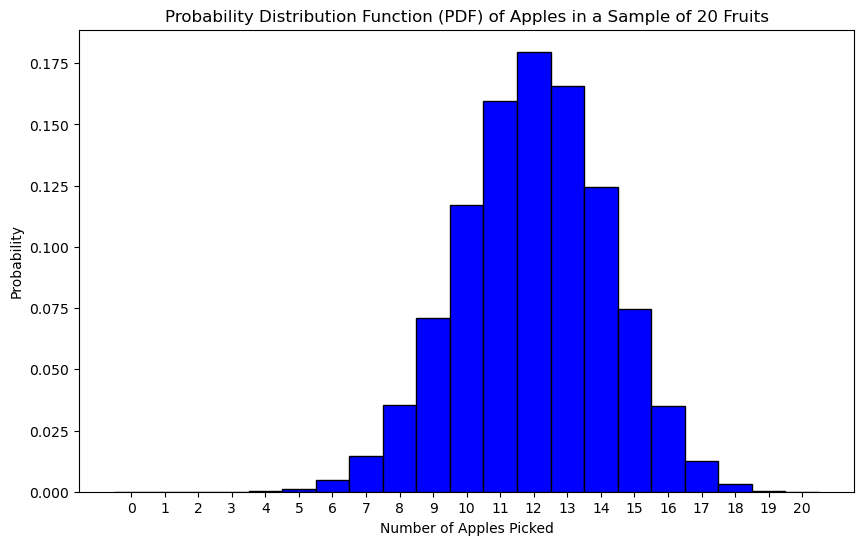

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters for the binomial distribution
n = 20  # number of trials (fruits picked)
p = 0.6  # probability of picking an apple

# Possible number of successes (number of apples picked)
k = np.arange(0, n + 1)

# Calculate the PMF (probability mass function)
pmf = binom.pmf(k, n, p)

# Plotting the PDF
plt.figure(figsize=(10, 6))
plt.bar(x, pmf,  color='blue', width=1, edgecolor='black')
plt.title('Probability Distribution Function (PDF) of Apples in a Sample of 20 Fruits')
plt.xlabel('Number of Apples Picked')
plt.ylabel('Probability')
plt.xticks(x)  # Show each integer on x-axis
plt.show()


## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [74]:
import math 
k=5
avg_goals =2.3
l = 1 / avg_goals
p = l *math.exp(-l*5)
print(f"Probability of scoring exactly {k} goals: {p:.4f}")


Probability of scoring exactly 5 goals: 0.0494


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

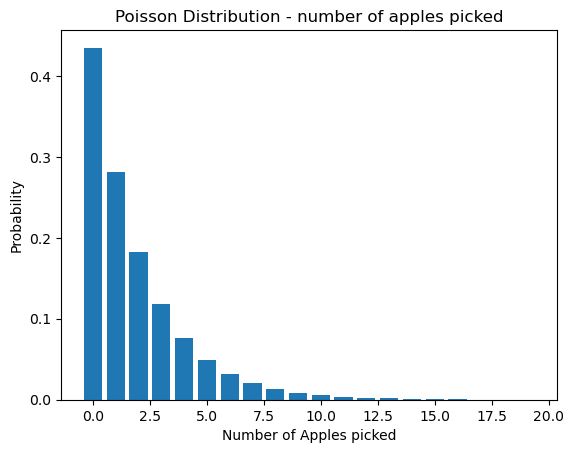

In [77]:
# Visualizing the distribution of customer arrivals
# Generate a range of possible customer arrival numbers
lambda_rate = 1/ avg_goals
k_values = np.arange(0, 20)
# Calculate probability for each number of arrivals
#pmf_values = stats.poisson.pmf(k_values, lambda_rate)
pmf_values = []
for k in k_values:
    pmf_value = lambda_rate * math.exp(-lambda_rate * k)
    pmf_values.append(pmf_value)


# Create a bar plot
plt.bar(k_values, pmf_values)
plt.title("Poisson Distribution - number of apples picked")
plt.xlabel("Number of Apples picked")
plt.ylabel("Probability")
plt.show()